In [1]:
from bs4 import BeautifulSoup
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The goal of this project is to scrape data from IMDb, and predict the worldwide gross of a sequel, based on features of the original

In [2]:
def soup_from_IMDb(title):
    """
    Function that converts a title from the IMDb website to soup
    
    Input: string of a movie title from IMDb url
    
    Output: soup of IMDb webite
    """
    url = 'https://www.imdb.com/title/' + title
    response = requests.get(url)
    page = response.text
    soup = BeautifulSoup(page, "lxml")
    return soup
    

In [3]:
soup = soup_from_IMDb('tt0100403/')

### Want to creat a funciton that takes soup and creates a dictionary with keys:
### Title, Domestic Gross, Worldwide Gross, Opening Weekend Revenue, Budget, Runtime, Release Date,
### MPAA Rating, Genre, and IMDb Rating

In [4]:
title_string = soup.find('title').text

title_string

'Predator 2 (1990) - IMDb'

In [5]:
title = title_string.split('(')[0].strip()

title

'Predator 2'

In [6]:
# Looking for Gross USA
import re
gross_us_regex = re.compile('Gross')
soup.find(text = gross_us_regex)

'Gross USA:'

In [7]:
gross_us_string = soup.find(text = re.compile('Gross'))
gross_us_string

'Gross USA:'

In [8]:
gross_us_string.findParent()

<h4 class="inline">Gross USA:</h4>

In [9]:
gross_us_string.findParent().findParent()

<div class="txt-block">
<h4 class="inline">Gross USA:</h4> $30,669,413        </div>

In [10]:
gross_us = gross_us_string.findParent().findParent().text
gross_us = gross_us.strip()

In [11]:
gross_us = gross_us[gross_us.find('$') + 1::].replace(',','')
gross_us = int(gross_us)
print(gross_us)

30669413


In [12]:
def find_gross_us(movie_soup):
    """
    Function that outputs the gross domestic of a movie
    
    Input: soup from IMDb
    
    Output: integer of gross domestic
    """
    moneystring = movie_soup.find(text = re.compile('Gross USA:')).findParent().findParent().text.strip()
    moneystring = moneystring[(moneystring.find('$') + 1)::].replace(',', '')
    return int(moneystring)

In [13]:
find_gross_us(soup)

30669413

In [14]:
# Tweaking the find_gross_us function to find_gross_world
def find_gross_world(movie_soup):
    """
    Function that outputs the worldwide gross of a movie
    
    Input: soup from IMDb
    
    Output: integer of worldwide gross
    """
    moneystring = movie_soup.find(text = re.compile('Worldwide Gross:')).findParent().findParent().text.strip()
    moneystring = moneystring[(moneystring.find('$') + 1)::].replace(',', '')
    return int(moneystring)

In [15]:
find_gross_world(soup)

57120318

In [16]:
# Tweaking the find_gross_us function to find_opening_weekend_rev
def find_opening_weekend_rev(movie_soup):
    """
    Function that outputs the opening weekend revenue of a movie
    
    Input: soup from IMDb
    
    Output: integer of opening weekend revenue
    """
    moneystring = movie_soup.find(text = re.compile('Opening Weekend USA:')).findParent().findParent().text.strip()
    moneystring = moneystring[(moneystring.find('$') + 1):moneystring.find('\n'):].replace(',', '')
    return int(moneystring)

In [17]:
find_opening_weekend_rev(soup)

8784943

In [18]:
# Tweaking the find_gross_us function to find_budget
def find_budget(movie_soup):
    """
    Function that outputs the budget of a movie
    
    Input: soup from IMDb
    
    Output: integer of budget
    """
    moneystring = movie_soup.find(text = re.compile('Budget:')).findParent().findParent().text.strip()
    moneystring = moneystring[(moneystring.find('$') + 1):moneystring.find('\n'):].replace(',', '')
    return int(moneystring)

In [19]:
budget = find_budget(soup)

budget

35000000

In [20]:
def get_movie_value(soup, field_name):
    
    '''Grab a value from IMDb
    
    Takes a string attribute of a movie on the page and returns the string in
    the next sibling object (the value for that attribute) or None if nothing is found.
    '''
    
    obj = soup.find(text=re.compile(field_name))
    
    if not obj: 
        return None
    
    # this works for most of the values
    next_element = obj.findNext()
    
    if next_element:
        return next_element.text 
    else:
        return None

In [21]:
# Finding runtime
runtime = get_movie_value(soup, 'Runtime:')

runtime

'108 min'

In [22]:
runtime = int(runtime.split()[0])

runtime

108

In [23]:
# Find MPAA rating
MPAA_rating = get_movie_value(soup, 'MPAA')

MPAA_rating

'Rated R for strong violence and language, and for sensuality and drug content'

In [24]:
MPAA_rating = MPAA_rating.split()[1]

MPAA_rating

'R'

In [25]:
# Another way to find MPAA rating
MPAA_rating = soup.find('div', class_ = 'subtext').text.split('\n')[1].strip()
possible_ratings = 'GPG-13RNC17'

MPAA_rating

'R'

In [26]:
if re.search(MPAA_rating, possible_ratings):
    print('yes')

yes


In [27]:
# Finding relase date
release_date = get_movie_value(soup, 'Release Date')

release_date

'\nOfficial Sites '

In [28]:
# Looking for release date
date_regex = re.compile('Release Date:')
soup.find(text = date_regex)

'Release Date:'

In [29]:
date_string = soup.find(text = re.compile('Release Date:'))
date_string

'Release Date:'

In [30]:
date_string.findParent()

<h4 class="inline">Release Date:</h4>

In [31]:
date_string.findParent().text

'Release Date:'

In [32]:
date_string.findParent().findParent()

<div class="txt-block">
<h4 class="inline">Release Date:</h4> 21 November 1990 (USA)
    <span class="see-more inline">
<a href="releaseinfo">See more</a> »
    </span>
</div>

In [33]:
date_string.findParent().findParent().text

'\nRelease Date: 21 November 1990 (USA)\n    \nSee more\xa0»\n    \n'

In [34]:
release_date = (date_string.findParent().findParent().text).split()[2:5]
release_date = release_date[0] + ' ' + release_date[1] + ' ' + release_date[2]

release_date

'21 November 1990'

In [35]:
def find_date(movie_soup):
    """
    Function that outputs the release date of a movie
    
    Input: soup from IMDb
    
    Output: string of date
    """
    datestring = movie_soup.find(text = re.compile('Release Date:'))
    datestring = datestring.findParent().findParent().text.split()[2:5]
    datestring = datestring[0] + ' ' + datestring[1] + ' ' + datestring[2]
    
    return datestring

In [36]:
release_date = find_date(soup)

release_date

'21 November 1990'

In [37]:
#Finding genre
genre = get_movie_value(soup, 'Genres:').strip()

genre

'Action'

In [38]:
# Finding IMDb rating
soup.find('span', itemprop = 'ratingValue').text

'6.3'

In [39]:
IMDb_rating = float(soup.find('span', itemprop = 'ratingValue').text)

IMDb_rating

6.3

In [40]:
def get_movie_dict(link):
    '''
    From IMDb title id, request movie html, parse with BeautifulSoup, and
    collect 
        - title 
        - domestic gross
        - worldwide gross
        - opening weekend revenue
        - budget
        - runtime 
        - MPAA rating
        - release date
        - genre
        - IMDb rating
    Return information as a dictionary.
    '''
    
    base_url = 'https://www.imdb.com'
    
    #Create full url to scrape
    url = base_url + link
    
    #Request HTML and parse
    response = requests.get(url)
    page = response.text
    soup = BeautifulSoup(page, 'lxml')

    
    headers = ['movie_title', 'domestic_total_gross', 'worldwide_total_gross',
               'opening_weekend_rev', 'budget', 'runtime_minutes', 'MPAA_rating', 
               'release_date', 'genre', 'IMDb_rating']
    
    #Get title
    try:
        title_string = soup.find('title').text
        title = title_string.split('(')[0].strip()
    except:
        title = float("NaN")
        
    #Get domestic gross
    try:
        domestic_total_gross = find_gross_us(soup)
    except:
        domestic_total_gross = float("NaN")
        
    #Get worldwide gross
    try:
        worldwide_total_gross = find_gross_world(soup)
    except:
        worldwide_total_gross = float("NaN")
        
    #Get opening weekend revenue
    try:
        opening_weekend_rev = find_opening_weekend_rev(soup)
    except:
        opening_weekend_rev = float("NaN")

    #Get budget
    try:
        budget = find_budget(soup)
    except:
        budget = float("NaN")
        
    #Get runtime
    try:
        runtime = get_movie_value(soup, 'Runtime:')
        if len(runtime) > 4:
            runtime = int(runtime.split()[0])
        else:
            runtime = int(runtime)
    except:
        runtime = float("NaN")
        
    #Get rating
    try:
        MPAA_rating = soup.find('div', class_ = 'subtext').text.split('\n')[1].strip()
        possible_ratings = 'GPG-13RNC17'
        if re.search(MPAA_rating, possible_ratings):
            MPAA_rating = MPAA_rating
        else:
            MPAA_rating = get_movie_value(soup,'MPAA')
            if len(str(MPAA_rating)) > 4:
                MPAA_rating = str(MPAA_rating).split()[1]
            else:
                MPAA_rating = MPAA_rating
    except:
        MPAA_rating = float("NaN")

    #Get release date
    try:
        release_date = find_date(soup)
    except:
        release_date = float("NaN")
        
    #Get Genre
    try:
        genre = get_movie_value(soup, 'Genres:').strip()
    except:
        genre = float("NaN")
        
    #Get IMDb rating
    try:
        IMDb_rating = float(soup.find('span', itemprop = 'ratingValue').text)
    except:
        IMDb_rating = float("NaN")
    #Create movie dictionary and return
    movie_dict = dict(zip(headers, [title, domestic_total_gross,
                                    worldwide_total_gross, 
                                    opening_weekend_rev, budget,
                                    runtime, MPAA_rating, 
                                    release_date, genre, IMDb_rating]))

    return movie_dict

In [41]:
get_movie_dict('/title/tt1231587/')

{'movie_title': 'Hot Tub Time Machine',
 'domestic_total_gross': 50287556,
 'worldwide_total_gross': 64780213,
 'opening_weekend_rev': 14020502,
 'budget': 36000000,
 'runtime_minutes': 101,
 'MPAA_rating': 'R',
 'release_date': '26 March 2010',
 'genre': 'Comedy',
 'IMDb_rating': 6.4}

## Now need to get all movies with sequels and their sequels

In [42]:
# Found a list containing movies and their sequels
url_with_sequels = 'https://www.imdb.com/list/ls003495084/' 
                    
response_with_sequels = requests.get(url_with_sequels)

In [43]:
page_with_sequels = response_with_sequels.text

In [44]:
soup_with_sequels = BeautifulSoup(page_with_sequels, 'lxml')

In [45]:
movie = soup_with_sequels.find('div', class_ = 'lister-item-content')

In [46]:
movie.find('a')

<a href="/title/tt0145487/">Spider-Man</a>

In [47]:
movie.find('a').get('href')

'/title/tt0145487/'

In [48]:
movies = soup_with_sequels.find_all('div', class_ = 'lister-item-content')

In [49]:
result = []
for title in movies:
    result.extend(title.find_all('a'))
    
result[0]

<a href="/title/tt0145487/">Spider-Man</a>

In [50]:
movie_urls = []
for tag in result:
    if '<a href="/title/' in str(tag):
        url = tag.get('href')
        if len(str(url)) < 18: #length of '/title/tt0000000/'
            movie_urls.append(url)

In [51]:
len(movie_urls) #100 movies! The whole page has 1000+ though


100

### Now need a list of urls of movies with sequels

In [52]:
def make_movie_list(soup):
    """
    Function that take in a soup of IMDb movie data, and creates a list of urls of movies with sequels
    
    Input: soup of IMDb movie data
    
    Output: list of urls of movies with sequels
    """
    movies = soup.find_all('div', class_ = 'lister-item-content')
    
    url_list = [] #Going to be the list of urls
    
    tags = []
    for title in movies:
        tags.extend(title.find_all('a'))
    
    for tag in tags:
        if '<a href="/title/' in str(tag):
            url = tag.get('href')
            if len(str(url)) < 18: #length of '/title/tt0000000/'
                url_list.append(url)
    
    return url_list
    


In [53]:
first_hundred_movies = make_movie_list(soup_with_sequels)

len(first_hundred_movies)

100

### Now run all of the urls through the dictionary maker

In [54]:
movies_and_sequels_info_list = []

for link in first_hundred_movies:
    movies_and_sequels_info_list.append(get_movie_dict(link))

In [55]:
movies_and_sequels_info = pd.DataFrame(movies_and_sequels_info_list)  #convert list of dict to df
movies_and_sequels_info.set_index('movie_title', inplace=True)

movies_and_sequels_info

,domestic_total_gross,worldwide_total_gross,opening_weekend_rev,budget,runtime_minutes,MPAA_rating,release_date,genre,IMDb_rating
movie_title,,,,,,,,,
Spider-Man,407022860.0,825025036.0,114844116.0,139000000.0,121,PG-13,3 May 2002,Action,7.3
Spider-Man 2,373585825.0,788976453.0,88156227.0,200000000.0,127,PG-13,30 June 2004,Action,7.3
Spider-Man 3,336530303.0,894983373.0,151116516.0,258000000.0,139,PG-13,4 May 2007,Action,6.2
The Matrix,171479930.0,465718867.0,27788331.0,63000000.0,136,R,31 March 1999,Action,8.7
The Matrix Reloaded,281576461.0,741847937.0,91774413.0,150000000.0,138,R,15 May 2003,Action,7.2
...,...,...,...,...,...,...,...,...,...
Final Destination 5,42587643.0,157887643.0,18031396.0,40000000.0,92,R,12 August 2011,Horror,5.8
Underworld,51970690.0,95708457.0,21753759.0,22000000.0,121,R,19 September 2003,Action,7.0
Underworld: Evolution,62318875.0,111476513.0,26857181.0,50000000.0,106,R,20 January 2006,Action,6.7


### Now the rest of the 1000+ Movies

In [56]:
def soup_from_url(url):
    """
    Function that converts a url to soup
    
    Input: string of a url
    
    Output: soup of url
    """
    response = requests.get(url)
    page = response.text
    soup = BeautifulSoup(page, "lxml")
    return soup

In [57]:
second_hundred_soup = soup_from_url('https://www.imdb.com/list/ls003495084/?sort=list_order,asc&st_dt=&mode=simple&page=2&ref_=ttls_vw_smp')

In [58]:
second_hundred_movies = make_movie_list(second_hundred_soup)

In [59]:
for link in second_hundred_movies:
    movies_and_sequels_info_list.append(get_movie_dict(link))

In [60]:
movies_and_sequels_info = pd.DataFrame(movies_and_sequels_info_list)  #convert list of dict to df
movies_and_sequels_info.set_index('movie_title', inplace=True)

movies_and_sequels_info.sample(5)

,domestic_total_gross,worldwide_total_gross,opening_weekend_rev,budget,runtime_minutes,MPAA_rating,release_date,genre,IMDb_rating
movie_title,,,,,,,,,
The Crow: Salvation,NaN,NaN,NaN,10000000.0,102.0,R,14 June 2000,Action,4.9
Shrek,267665011.0,506429095.0,42347760.0,60000000.0,90.0,PG,18 May 2001,Animation,7.8
xXx: State of the Union,26873932.0,71022693.0,12712272.0,113000000.0,101.0,PG-13,29 April 2005,Action,4.4
Urban Legend,38072438.0,72527595.0,10515444.0,14000000.0,99.0,R,25 September 1998,Horror,5.6
Transformers: Revenge of the Fallen,402111870.0,836303693.0,108966307.0,200000000.0,149.0,PG-13,24 June 2009,Action,6.0


In [61]:
third_hundred_soup = soup_from_url('https://www.imdb.com/list/ls003495084/?st_dt=&mode=detail&page=3')
third_hundred_movies = make_movie_list(third_hundred_soup)

In [62]:
fourth_hundred_soup = soup_from_url('https://www.imdb.com/list/ls003495084/?st_dt=&mode=detail&page=4')
fourth_hundred_movies = make_movie_list(fourth_hundred_soup)

In [63]:
fifth_hundred_soup = soup_from_url('https://www.imdb.com/list/ls003495084/?st_dt=&mode=detail&page=5')
fifth_hundred_movies = make_movie_list(fifth_hundred_soup)

In [64]:
sixth_hundred_soup = soup_from_url('https://www.imdb.com/list/ls003495084/?st_dt=&mode=detail&page=6')
sixth_hundred_movies = make_movie_list(sixth_hundred_soup)

In [65]:
seventh_hundred_soup = soup_from_url('https://www.imdb.com/list/ls003495084/?st_dt=&mode=detail&page=7')
seventh_hundred_movies = make_movie_list(seventh_hundred_soup)

In [66]:
eighth_hundred_soup = soup_from_url('https://www.imdb.com/list/ls003495084/?st_dt=&mode=detail&page=8')
eighth_hundred_movies = make_movie_list(eighth_hundred_soup)

In [67]:
ninth_hundred_soup = soup_from_url('https://www.imdb.com/list/ls003495084/?st_dt=&mode=detail&page=9')
ninth_hundred_movies = make_movie_list(ninth_hundred_soup)

In [68]:
tenth_hundred_soup = soup_from_url('https://www.imdb.com/list/ls003495084/?st_dt=&mode=detail&page=10')
tenth_hundred_movies = make_movie_list(tenth_hundred_soup)

In [69]:
eleventh_hundred_soup = soup_from_url('https://www.imdb.com/list/ls003495084/?st_dt=&mode=detail&page=11')
eleventh_hundred_movies = make_movie_list(eleventh_hundred_soup)

In [70]:
twelfth_hundred_soup = soup_from_url('https://www.imdb.com/list/ls003495084/?st_dt=&mode=detail&page=12')
twelfth_hundred_movies = make_movie_list(twelfth_hundred_soup)

In [71]:
remaining_movies_list = third_hundred_movies + fourth_hundred_movies + fifth_hundred_movies + sixth_hundred_movies \
                        + seventh_hundred_movies + eighth_hundred_movies + ninth_hundred_movies + tenth_hundred_movies \
                        + eleventh_hundred_movies + twelfth_hundred_movies

In [72]:
for link in remaining_movies_list:
    movies_and_sequels_info_list.append(get_movie_dict(link))

In [73]:
len(movies_and_sequels_info_list)

1134

In [74]:
movies_and_sequels_info = pd.DataFrame(movies_and_sequels_info_list)  #convert list of dict to df
movies_and_sequels_info.set_index('movie_title', inplace=True)

movies_and_sequels_info

,domestic_total_gross,worldwide_total_gross,opening_weekend_rev,budget,runtime_minutes,MPAA_rating,release_date,genre,IMDb_rating
movie_title,,,,,,,,,
Spider-Man,407022860.0,8.250250e+08,114844116.0,139000000.0,121.0,PG-13,3 May 2002,Action,7.3
Spider-Man 2,373585825.0,7.889765e+08,88156227.0,200000000.0,127.0,PG-13,30 June 2004,Action,7.3
Spider-Man 3,336530303.0,8.949834e+08,151116516.0,258000000.0,139.0,PG-13,4 May 2007,Action,6.2
The Matrix,171479930.0,4.657189e+08,27788331.0,63000000.0,136.0,R,31 March 1999,Action,8.7
The Matrix Reloaded,281576461.0,7.418479e+08,91774413.0,150000000.0,138.0,R,15 May 2003,Action,7.2
...,...,...,...,...,...,...,...,...,...
Frozen,400738009.0,1.280803e+09,243390.0,150000000.0,102.0,PG,27 November 2013,Animation,7.4
Frozen II,477373578.0,1.450027e+09,130263358.0,150000000.0,103.0,PG,22 November 2019,Animation,6.9
Drunken Master,NaN,NaN,NaN,NaN,111.0,PG-13,5 October 1978,Action,7.5


In [75]:
movies_and_sequels_info = movies_and_sequels_info[~movies_and_sequels_info.index.duplicated(keep='first')]

In [76]:
movies_and_sequels_info

,domestic_total_gross,worldwide_total_gross,opening_weekend_rev,budget,runtime_minutes,MPAA_rating,release_date,genre,IMDb_rating
movie_title,,,,,,,,,
Spider-Man,407022860.0,8.250250e+08,114844116.0,139000000.0,121.0,PG-13,3 May 2002,Action,7.3
Spider-Man 2,373585825.0,7.889765e+08,88156227.0,200000000.0,127.0,PG-13,30 June 2004,Action,7.3
Spider-Man 3,336530303.0,8.949834e+08,151116516.0,258000000.0,139.0,PG-13,4 May 2007,Action,6.2
The Matrix,171479930.0,4.657189e+08,27788331.0,63000000.0,136.0,R,31 March 1999,Action,8.7
The Matrix Reloaded,281576461.0,7.418479e+08,91774413.0,150000000.0,138.0,R,15 May 2003,Action,7.2
...,...,...,...,...,...,...,...,...,...
Frozen,400738009.0,1.280803e+09,243390.0,150000000.0,102.0,PG,27 November 2013,Animation,7.4
Frozen II,477373578.0,1.450027e+09,130263358.0,150000000.0,103.0,PG,22 November 2019,Animation,6.9
Drunken Master,NaN,NaN,NaN,NaN,111.0,PG-13,5 October 1978,Action,7.5


### I have some NaNs, and I could fill them with means or medians, but my research told me that MICE was the best option

In [77]:
import fancyimpute  
from fancyimpute import IterativeImputer
from sklearn.impute import SimpleImputer 

In [78]:
# Getting only the float columns
floats = movies_and_sequels_info[['domestic_total_gross', 'worldwide_total_gross', 'opening_weekend_rev', 'budget',
                                  'runtime_minutes', 'IMDb_rating']]
type(floats)

pandas.core.frame.DataFrame

In [79]:
MICE = IterativeImputer()
floats = MICE.fit_transform(floats)
floats = pd.DataFrame(floats, columns = ['domestic_total_gross', 'worldwide_total_gross', 
                                         'opening_weekend_rev', 'budget', 'runtime_minutes', 
                                         'IMDb_rating']).set_index(movies_and_sequels_info.index)

floats

/Users/zacharybrandt/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


,domestic_total_gross,worldwide_total_gross,opening_weekend_rev,budget,runtime_minutes,IMDb_rating
movie_title,,,,,,
Spider-Man,4.070229e+08,8.250250e+08,1.148441e+08,1.390000e+08,121.0,7.3
Spider-Man 2,3.735858e+08,7.889765e+08,8.815623e+07,2.000000e+08,127.0,7.3
Spider-Man 3,3.365303e+08,8.949834e+08,1.511165e+08,2.580000e+08,139.0,6.2
The Matrix,1.714799e+08,4.657189e+08,2.778833e+07,6.300000e+07,136.0,8.7
The Matrix Reloaded,2.815765e+08,7.418479e+08,9.177441e+07,1.500000e+08,138.0,7.2
...,...,...,...,...,...,...
Frozen,4.007380e+08,1.280803e+09,2.433900e+05,1.500000e+08,102.0,7.4
Frozen II,4.773736e+08,1.450027e+09,1.302634e+08,1.500000e+08,103.0,6.9
Drunken Master,9.574784e+07,2.176111e+08,2.641806e+07,5.016529e+07,111.0,7.5


In [80]:
movies_and_sequels_info[['domestic_total_gross', 'worldwide_total_gross', 
                          'opening_weekend_rev', 'budget', 'runtime_minutes', 'IMDb_rating']] = floats
movies_and_sequels_info

/Users/zacharybrandt/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,domestic_total_gross,worldwide_total_gross,opening_weekend_rev,budget,runtime_minutes,MPAA_rating,release_date,genre,IMDb_rating
movie_title,,,,,,,,,
Spider-Man,4.070229e+08,8.250250e+08,1.148441e+08,1.390000e+08,121.0,PG-13,3 May 2002,Action,7.3
Spider-Man 2,3.735858e+08,7.889765e+08,8.815623e+07,2.000000e+08,127.0,PG-13,30 June 2004,Action,7.3
Spider-Man 3,3.365303e+08,8.949834e+08,1.511165e+08,2.580000e+08,139.0,PG-13,4 May 2007,Action,6.2
The Matrix,1.714799e+08,4.657189e+08,2.778833e+07,6.300000e+07,136.0,R,31 March 1999,Action,8.7
The Matrix Reloaded,2.815765e+08,7.418479e+08,9.177441e+07,1.500000e+08,138.0,R,15 May 2003,Action,7.2
...,...,...,...,...,...,...,...,...,...
Frozen,4.007380e+08,1.280803e+09,2.433900e+05,1.500000e+08,102.0,PG,27 November 2013,Animation,7.4
Frozen II,4.773736e+08,1.450027e+09,1.302634e+08,1.500000e+08,103.0,PG,22 November 2019,Animation,6.9
Drunken Master,9.574784e+07,2.176111e+08,2.641806e+07,5.016529e+07,111.0,PG-13,5 October 1978,Action,7.5


In [81]:
movies_and_sequels_info.min()

domestic_total_gross             809
worldwide_total_gross   -3.09052e+07
opening_weekend_rev     -1.77281e+06
budget                          7000
runtime_minutes                   21
genre                         Action
IMDb_rating                      1.4
dtype: object

In [82]:
# worldwide_total_gross cannot be less than domestic_total_gross, and definitely not negative,
# so set worldwide_total_gross min to domestic_total_gross min
movies_and_sequels_info['worldwide_total_gross'] = np.where(movies_and_sequels_info.worldwide_total_gross <
                                                            movies_and_sequels_info.domestic_total_gross, 
                                                            movies_and_sequels_info.domestic_total_gross,
                                                            movies_and_sequels_info.worldwide_total_gross)

<ipython-input-82-8640fb545b95>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_and_sequels_info['worldwide_total_gross'] = np.where(movies_and_sequels_info.worldwide_total_gross <


In [83]:
movies_and_sequels_info.min()

domestic_total_gross             809
worldwide_total_gross          30471
opening_weekend_rev     -1.77281e+06
budget                          7000
runtime_minutes                   21
genre                         Action
IMDb_rating                      1.4
dtype: object

In [84]:
# Opening Weekend also cannot be negative, so I set minumum to 0
movies_and_sequels_info['opening_weekend_rev'] = np.where(movies_and_sequels_info.opening_weekend_rev < 0, 
                                                           0,
                                                           movies_and_sequels_info.opening_weekend_rev)

<ipython-input-84-dfe0bc086e0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_and_sequels_info['opening_weekend_rev'] = np.where(movies_and_sequels_info.opening_weekend_rev < 0,


In [85]:
movies_and_sequels_info.min()

domestic_total_gross        809
worldwide_total_gross     30471
opening_weekend_rev           0
budget                     7000
runtime_minutes              21
genre                    Action
IMDb_rating                 1.4
dtype: object

In [86]:
movies_and_sequels_info[movies_and_sequels_info.release_date.isna()]

,domestic_total_gross,worldwide_total_gross,opening_weekend_rev,budget,runtime_minutes,MPAA_rating,release_date,genre,IMDb_rating
movie_title,,,,,,,,,
Austin Powers 4 - IMDb,9.574784e+07,2.176111e+08,2.641806e+07,5.016529e+07,105.272021,None,NaN,Comedy,6.239138
Kill Bill: Vol. 3 - IMDb,9.574784e+07,2.176111e+08,2.641806e+07,5.016529e+07,105.272021,None,NaN,Action,6.239138
Hellraiser - IMDb,9.574784e+07,2.176111e+08,2.641806e+07,5.016529e+07,105.272021,None,NaN,Horror,6.239138
The Karate Kid 2 - IMDb,9.574784e+07,2.176111e+08,2.641806e+07,5.016529e+07,105.272021,None,NaN,Action,6.239138
Rush Hour 4 - IMDb,9.574784e+07,2.176111e+08,2.641806e+07,5.016529e+07,105.272021,None,NaN,Action,6.239138
National Treasure 3 - IMDb,9.574784e+07,2.176111e+08,2.641806e+07,5.016529e+07,105.272021,None,NaN,Action,6.239138
Untitled I Am Legend Reboot - IMDb,9.574784e+07,2.176111e+08,2.641806e+07,5.016529e+07,105.272021,None,NaN,Action,6.239138
Machete Kills in Space - IMDb,9.574784e+07,2.176111e+08,2.641806e+07,5.016529e+07,105.272021,None,NaN,Action,6.239138
The Best Man Wedding - IMDb,9.574784e+07,2.176111e+08,2.641806e+07,5.016529e+07,105.272021,None,NaN,Comedy,6.239138


In [87]:
# Adding column for time_between_sequel
todrop = (movies_and_sequels_info[movies_and_sequels_info.release_date.isna()]).index
movies_and_sequels_info.drop(todrop, inplace = True)

/Users/zacharybrandt/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [88]:
movies_and_sequels_info

,domestic_total_gross,worldwide_total_gross,opening_weekend_rev,budget,runtime_minutes,MPAA_rating,release_date,genre,IMDb_rating
movie_title,,,,,,,,,
Spider-Man,4.070229e+08,8.250250e+08,1.148441e+08,1.390000e+08,121.0,PG-13,3 May 2002,Action,7.3
Spider-Man 2,3.735858e+08,7.889765e+08,8.815623e+07,2.000000e+08,127.0,PG-13,30 June 2004,Action,7.3
Spider-Man 3,3.365303e+08,8.949834e+08,1.511165e+08,2.580000e+08,139.0,PG-13,4 May 2007,Action,6.2
The Matrix,1.714799e+08,4.657189e+08,2.778833e+07,6.300000e+07,136.0,R,31 March 1999,Action,8.7
The Matrix Reloaded,2.815765e+08,7.418479e+08,9.177441e+07,1.500000e+08,138.0,R,15 May 2003,Action,7.2
...,...,...,...,...,...,...,...,...,...
Frozen,4.007380e+08,1.280803e+09,2.433900e+05,1.500000e+08,102.0,PG,27 November 2013,Animation,7.4
Frozen II,4.773736e+08,1.450027e+09,1.302634e+08,1.500000e+08,103.0,PG,22 November 2019,Animation,6.9
Drunken Master,9.574784e+07,2.176111e+08,2.641806e+07,5.016529e+07,111.0,PG-13,5 October 1978,Action,7.5


In [89]:
todrop2 = (movies_and_sequels_info[movies_and_sequels_info.release_date.str.contains('\(')]).index
movies_and_sequels_info.drop(todrop2, inplace = True)

/Users/zacharybrandt/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [90]:
movies_and_sequels_info['release_date'] = pd.to_datetime(movies_and_sequels_info['release_date'])

<ipython-input-90-12289636e6a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_and_sequels_info['release_date'] = pd.to_datetime(movies_and_sequels_info['release_date'])


In [91]:
movies_and_sequels_info['time_between_sequel'] = abs(movies_and_sequels_info.release_date.diff(periods = -1)) / np.timedelta64(1, 'Y') 

<ipython-input-91-9ae6e8826a99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_and_sequels_info['time_between_sequel'] = abs(movies_and_sequels_info.release_date.diff(periods = -1)) / np.timedelta64(1, 'Y')


In [92]:
movies_and_sequels_info.time_between_sequel

movie_title
Spider-Man                       2.160209
Spider-Man 2                     2.841947
Spider-Man 3                     8.093253
The Matrix                       4.123288
The Matrix Reloaded              0.476396
                                  ...    
Frozen                           5.985065
Frozen II                       41.131577
Drunken Master                  22.042889
The Legend of Drunken Master     6.302662
Drunken Master Killer                 NaN
Name: time_between_sequel, Length: 1087, dtype: float64

### Now I need a list of just the original movies (not the sequels)

In [93]:
originals = [i for i in range(0, len(movies_and_sequels_info) -1 ) \
                       if (movies_and_sequels_info.index[i])[:7:] in movies_and_sequels_info.index[i + 1]]
len(originals) # 559 originals will be my dataset

538

In [94]:
originals_list = (movies_and_sequels_info.index[originals]).tolist()
originals_list # There they are

['Spider-Man',
 'Spider-Man 2',
 'The Matrix',
 'The Matrix Reloaded',
 'The Lord of the Rings: The Fellowship of the Ring',
 'The Lord of the Rings: The Two Towers',
 'Back to the Future',
 'Back to the Future Part II',
 'Lethal Weapon',
 'Lethal Weapon 2',
 'Lethal Weapon 3',
 'Die Hard',
 'Die Hard 2',
 'Die Hard with a Vengeance',
 'Mad Max',
 'Mad Max 2: The Road Warrior',
 'Rocky',
 'Rocky II',
 'Rocky III',
 'First Blood',
 'Terminator 2: Judgment Day',
 'Terminator 3: Rise of the Machines',
 'RoboCop',
 'RoboCop 2',
 'X-Men',
 'xXx',
 'The Chronicles of Riddick',
 'Transporter 2',
 'Crank',
 'Alien',
 'Predator',
 'Predator 2',
 'Saw',
 'Saw II',
 'Saw V',
 'Species',
 'Species II',
 'Species III',
 'Scream',
 'Scream 2',
 'Scream 3',
 'Final Destination',
 'Final Destination 2',
 'Final Destination 3',
 'Underworld',
 'Underworld: Evolution',
 'Underworld: Rise of the Lycans',
 'Darkman',
 'Darkman II: The Return of Durant',
 'Transformers',
 'Transformers: Revenge of the Fall

### Now I am going to add my target variable column: sequel_worldwide_total_gross

In [95]:
movies_and_sequels_info['sequel_worldwide_total_gross'] = np.where(movies_and_sequels_info.index.isin(originals_list), 
                                                                    movies_and_sequels_info['worldwide_total_gross'].shift(-1),
                                                                    float('Nan')
                                                                    )

<ipython-input-95-3dc490b41948>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_and_sequels_info['sequel_worldwide_total_gross'] = np.where(movies_and_sequels_info.index.isin(originals_list),


In [96]:
movies_and_sequels_info.head(10)

,domestic_total_gross,worldwide_total_gross,opening_weekend_rev,budget,runtime_minutes,MPAA_rating,release_date,genre,IMDb_rating,time_between_sequel,sequel_worldwide_total_gross
movie_title,,,,,,,,,,,
Spider-Man,407022860.0,8.250250e+08,114844116.0,139000000.0,121.0,PG-13,2002-05-03,Action,7.3,2.160209,7.889765e+08
Spider-Man 2,373585825.0,7.889765e+08,88156227.0,200000000.0,127.0,PG-13,2004-06-30,Action,7.3,2.841947,8.949834e+08
Spider-Man 3,336530303.0,8.949834e+08,151116516.0,258000000.0,139.0,PG-13,2007-05-04,Action,6.2,8.093253,NaN
The Matrix,171479930.0,4.657189e+08,27788331.0,63000000.0,136.0,R,1999-03-31,Action,8.7,4.123288,7.418479e+08
The Matrix Reloaded,281576461.0,7.418479e+08,91774413.0,150000000.0,138.0,R,2003-05-15,Action,7.2,0.476396,4.273443e+08
The Matrix Revolutions,139313948.0,4.273443e+08,48475154.0,150000000.0,129.0,R,2003-11-05,Action,6.8,1.878204,NaN
The Lord of the Rings: The Fellowship of the Ring,315544750.0,8.879350e+08,47211490.0,93000000.0,178.0,PG-13,2001-12-19,Action,8.8,0.996598,9.432823e+08
The Lord of the Rings: The Two Towers,342551365.0,9.432823e+08,62007528.0,94000000.0,179.0,PG-13,2002-12-18,Action,8.7,0.996598,1.142271e+09
The Lord of the Rings: The Return of the King,377845905.0,1.142271e+09,72629713.0,94000000.0,201.0,PG-13,2003-12-17,Action,8.9,18.456231,NaN


### Since I am only woring with originals, I can drop the final sequels

In [97]:
only_originals = movies_and_sequels_info.dropna(subset = ['sequel_worldwide_total_gross'])

In [98]:
only_originals.head(5)

,domestic_total_gross,worldwide_total_gross,opening_weekend_rev,budget,runtime_minutes,MPAA_rating,release_date,genre,IMDb_rating,time_between_sequel,sequel_worldwide_total_gross
movie_title,,,,,,,,,,,
Spider-Man,407022860.0,825025036.0,114844116.0,139000000.0,121.0,PG-13,2002-05-03,Action,7.3,2.160209,788976453.0
Spider-Man 2,373585825.0,788976453.0,88156227.0,200000000.0,127.0,PG-13,2004-06-30,Action,7.3,2.841947,894983373.0
The Matrix,171479930.0,465718867.0,27788331.0,63000000.0,136.0,R,1999-03-31,Action,8.7,4.123288,741847937.0
The Matrix Reloaded,281576461.0,741847937.0,91774413.0,150000000.0,138.0,R,2003-05-15,Action,7.2,0.476396,427344277.0
The Lord of the Rings: The Fellowship of the Ring,315544750.0,887934994.0,47211490.0,93000000.0,178.0,PG-13,2001-12-19,Action,8.8,0.996598,943282270.0


In [99]:
only_originals.min()

domestic_total_gross                           8744
worldwide_total_gross                         30471
opening_weekend_rev                               0
budget                                        15000
runtime_minutes                                  26
release_date                    1942-08-21 00:00:00
genre                                        Action
IMDb_rating                                       2
time_between_sequel                               0
sequel_worldwide_total_gross                 126247
dtype: object

In [100]:
only_originals.max()

domestic_total_gross                    6.78815e+08
worldwide_total_gross                   2.04836e+09
opening_weekend_rev                     2.57698e+08
budget                                     3.21e+08
runtime_minutes                                 202
release_date                    2021-11-19 00:00:00
genre                                      Thriller
IMDb_rating                                     9.2
time_between_sequel                         63.4674
sequel_worldwide_total_gross             2.7978e+09
dtype: object

In [101]:
only_originals[only_originals.isna().any(axis=1)]

,domestic_total_gross,worldwide_total_gross,opening_weekend_rev,budget,runtime_minutes,MPAA_rating,release_date,genre,IMDb_rating,time_between_sequel,sequel_worldwide_total_gross
movie_title,,,,,,,,,,,
Ice Age: A Mammoth Christmas,9.574784e+07,2.176111e+08,2.641806e+07,5.016529e+07,26.000000,None,2011-11-24,Animation,6.500000,0.635194,8.772448e+08
Wrong Turn 3: Left for Dead,3.966029e+07,4.694560e+07,5.359610e+06,3.000000e+06,92.000000,None,2009-10-20,Horror,4.600000,2.012362,4.694560e+07
Boogeyman 2,2.260750e+07,2.260750e+07,1.680005e+06,4.500000e+06,93.000000,None,2008-01-08,Drama,5.100000,1.034929,2.058214e+07
A Nightmare on Elm Street,2.550451e+07,2.550451e+07,1.271000e+06,1.800000e+06,91.000000,None,1984-11-16,Horror,7.500000,0.958267,2.999921e+07
"""Sharpe"" Sharpe's Rifles",9.574784e+07,2.176111e+08,2.641806e+07,5.016529e+07,113.002886,None,1993-05-05,Adventure,7.800000,0.019165,2.176111e+08
"""Sharpe"" Sharpe's Eagle",9.574784e+07,2.176111e+08,2.641806e+07,5.016529e+07,100.000000,None,1993-05-12,Adventure,7.900000,2.004148,2.176111e+08
"""Sharpe"" Sharpe's Company",9.574784e+07,2.176111e+08,2.641806e+07,5.016529e+07,100.000000,None,1995-05-14,Adventure,7.900000,0.019165,2.176111e+08
"""Sharpe"" Sharpe's Enemy",9.574784e+07,2.176111e+08,2.641806e+07,5.016529e+07,90.000000,None,1995-05-21,Adventure,7.900000,0.019165,2.176111e+08
"""Sharpe"" Sharpe's Honour",9.574784e+07,2.176111e+08,2.641806e+07,5.016529e+07,101.000000,None,1995-05-28,Adventure,7.700000,11.093999,2.176111e+08


In [102]:
# Sharpe is a TV show, drop
only_originals = only_originals[~only_originals.index.str.contains("Sharpe")]

In [103]:
# Checked the "None" MPAA ratings, and they are literally not rated

### Working with dummy variables on genre and MPAA rating

In [104]:
genre_dummies = pd.get_dummies(only_originals.genre, drop_first = True)
genre_dummies

,Adventure,Animation,Biography,Comedy,Crime,Drama,Fantasy,Horror,Sci-Fi,Thriller
movie_title,,,,,,,,,,
Spider-Man,0,0,0,0,0,0,0,0,0,0
Spider-Man 2,0,0,0,0,0,0,0,0,0,0
The Matrix,0,0,0,0,0,0,0,0,0,0
The Matrix Reloaded,0,0,0,0,0,0,0,0,0,0
The Lord of the Rings: The Fellowship of the Ring,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
Angry Birds,0,1,0,0,0,0,0,0,0,0
It,0,0,0,0,0,0,0,1,0,0
Zombieland,1,0,0,0,0,0,0,0,0,0


In [105]:
only_originals = pd.merge(only_originals, genre_dummies, left_index=True, right_index=True)
only_originals.drop(columns = ['genre'], inplace = True)

only_originals

,domestic_total_gross,worldwide_total_gross,opening_weekend_rev,budget,runtime_minutes,MPAA_rating,release_date,IMDb_rating,time_between_sequel,sequel_worldwide_total_gross,Adventure,Animation,Biography,Comedy,Crime,Drama,Fantasy,Horror,Sci-Fi,Thriller
movie_title,,,,,,,,,,,,,,,,,,,,
Spider-Man,4.070229e+08,8.250250e+08,1.148441e+08,1.390000e+08,121.0,PG-13,2002-05-03,7.3,2.160209,7.889765e+08,0,0,0,0,0,0,0,0,0,0
Spider-Man 2,3.735858e+08,7.889765e+08,8.815623e+07,2.000000e+08,127.0,PG-13,2004-06-30,7.3,2.841947,8.949834e+08,0,0,0,0,0,0,0,0,0,0
The Matrix,1.714799e+08,4.657189e+08,2.778833e+07,6.300000e+07,136.0,R,1999-03-31,8.7,4.123288,7.418479e+08,0,0,0,0,0,0,0,0,0,0
The Matrix Reloaded,2.815765e+08,7.418479e+08,9.177441e+07,1.500000e+08,138.0,R,2003-05-15,7.2,0.476396,4.273443e+08,0,0,0,0,0,0,0,0,0,0
The Lord of the Rings: The Fellowship of the Ring,3.155448e+08,8.879350e+08,4.721149e+07,9.300000e+07,178.0,PG-13,2001-12-19,8.8,0.996598,9.432823e+08,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Angry Birds,1.075094e+08,3.523339e+08,3.815518e+07,7.300000e+07,97.0,PG,2016-05-20,6.3,3.233468,1.477920e+08,0,1,0,0,0,0,0,0,0,0
It,3.288289e+08,7.017964e+08,1.234034e+08,3.500000e+07,135.0,R,2017-09-08,7.3,1.993196,4.730932e+08,0,0,0,0,0,0,0,1,0,0
Zombieland,7.559029e+07,1.023921e+08,2.473316e+07,2.360000e+07,88.0,R,2009-10-02,7.6,10.042643,1.228104e+08,1,0,0,0,0,0,0,0,0,0


In [106]:
# Same thing for MPAA ratings
mpaa_dummies = pd.get_dummies(only_originals.MPAA_rating, drop_first = True)

In [107]:
only_originals = pd.merge(only_originals, mpaa_dummies, left_index=True, right_index=True)
only_originals.drop(columns = ['MPAA_rating'], inplace = True)

only_originals

,domestic_total_gross,worldwide_total_gross,opening_weekend_rev,budget,runtime_minutes,release_date,IMDb_rating,time_between_sequel,sequel_worldwide_total_gross,Adventure,...,Drama,Fantasy,Horror,Sci-Fi,Thriller,G,NC-17,PG,PG-13,R
movie_title,,,,,,,,,,,,,,,,,,,,,
Spider-Man,4.070229e+08,8.250250e+08,1.148441e+08,1.390000e+08,121.0,2002-05-03,7.3,2.160209,7.889765e+08,0,...,0,0,0,0,0,0,0,0,1,0
Spider-Man 2,3.735858e+08,7.889765e+08,8.815623e+07,2.000000e+08,127.0,2004-06-30,7.3,2.841947,8.949834e+08,0,...,0,0,0,0,0,0,0,0,1,0
The Matrix,1.714799e+08,4.657189e+08,2.778833e+07,6.300000e+07,136.0,1999-03-31,8.7,4.123288,7.418479e+08,0,...,0,0,0,0,0,0,0,0,0,1
The Matrix Reloaded,2.815765e+08,7.418479e+08,9.177441e+07,1.500000e+08,138.0,2003-05-15,7.2,0.476396,4.273443e+08,0,...,0,0,0,0,0,0,0,0,0,1
The Lord of the Rings: The Fellowship of the Ring,3.155448e+08,8.879350e+08,4.721149e+07,9.300000e+07,178.0,2001-12-19,8.8,0.996598,9.432823e+08,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Angry Birds,1.075094e+08,3.523339e+08,3.815518e+07,7.300000e+07,97.0,2016-05-20,6.3,3.233468,1.477920e+08,0,...,0,0,0,0,0,0,0,1,0,0
It,3.288289e+08,7.017964e+08,1.234034e+08,3.500000e+07,135.0,2017-09-08,7.3,1.993196,4.730932e+08,0,...,0,0,1,0,0,0,0,0,0,1
Zombieland,7.559029e+07,1.023921e+08,2.473316e+07,2.360000e+07,88.0,2009-10-02,7.6,10.042643,1.228104e+08,1,...,0,0,0,0,0,0,0,0,0,1


In [108]:
only_originals.columns

Index(['domestic_total_gross', 'worldwide_total_gross', 'opening_weekend_rev',
       'budget', 'runtime_minutes', 'release_date', 'IMDb_rating',
       'time_between_sequel', 'sequel_worldwide_total_gross', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Fantasy',
       'Horror', 'Sci-Fi', 'Thriller', 'G', 'NC-17', 'PG', 'PG-13', 'R'],
      dtype='object')

In [109]:
only_originals.drop(columns = ['release_date'], inplace = True)

In [110]:
only_originals[only_originals.columns[1:8]].head()

,worldwide_total_gross,opening_weekend_rev,budget,runtime_minutes,IMDb_rating,time_between_sequel,sequel_worldwide_total_gross
movie_title,,,,,,,
Spider-Man,825025036.0,114844116.0,139000000.0,121.0,7.3,2.160209,788976453.0
Spider-Man 2,788976453.0,88156227.0,200000000.0,127.0,7.3,2.841947,894983373.0
The Matrix,465718867.0,27788331.0,63000000.0,136.0,8.7,4.123288,741847937.0
The Matrix Reloaded,741847937.0,91774413.0,150000000.0,138.0,7.2,0.476396,427344277.0
The Lord of the Rings: The Fellowship of the Ring,887934994.0,47211490.0,93000000.0,178.0,8.8,0.996598,943282270.0


In [111]:
only_originals.to_csv('only_originals.csv')

# Building the Model

In [112]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

### Plotting features to target to feature engineer

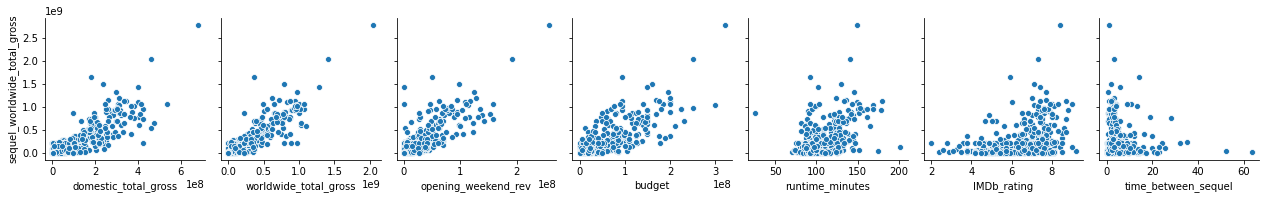

In [113]:
continuous = only_originals[['domestic_total_gross', 'worldwide_total_gross', 
                             'opening_weekend_rev', 'budget', 'runtime_minutes', 
                             'IMDb_rating', 'time_between_sequel', 'sequel_worldwide_total_gross']]
feat_to_target = sns.pairplot(data = continuous, x_vars = ['domestic_total_gross', 'worldwide_total_gross', 'opening_weekend_rev',
                                          'budget', 'runtime_minutes', 'IMDb_rating', 'time_between_sequel'],
                                                                     y_vars = ['sequel_worldwide_total_gross'])
feat_to_target.savefig('feat_to_target.png')

In [114]:
# domestic_total_gross looks quadratic
only_originals['domestic_total_gross2'] = only_originals['domestic_total_gross'] ** 2
# budget looks sqrt
only_originals['bugdetsqrt'] = only_originals['budget'] ** (1/2)
# IMDb_rating also looks quadratic
only_originals['IMDb_rating2'] = only_originals['IMDb_rating'] ** 2
# time_between_sequel looks like a 1/x
only_originals['time_between_sequel3'] = (1/2) ** only_originals['time_between_sequel']

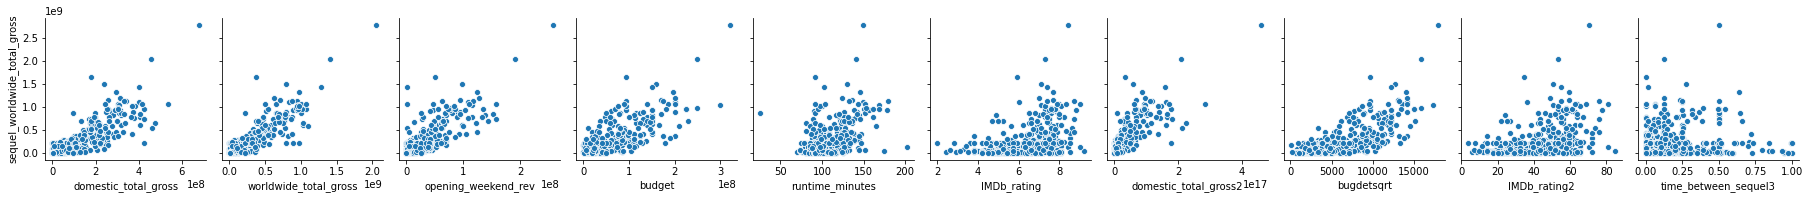

In [115]:
continuous2 = only_originals[['domestic_total_gross', 'worldwide_total_gross', 
                              'opening_weekend_rev', 'budget', 'runtime_minutes', 
                              'IMDb_rating', 'time_between_sequel', 'domestic_total_gross2', 'bugdetsqrt', 
                              'sequel_worldwide_total_gross', 'IMDb_rating2', 'time_between_sequel3']]
sns.pairplot(data = continuous2, x_vars = ['domestic_total_gross', 'worldwide_total_gross', 'opening_weekend_rev',
                                           'budget', 'runtime_minutes', 'IMDb_rating', 
                                           'domestic_total_gross2', 'bugdetsqrt', 'IMDb_rating2', 'time_between_sequel3'],
                                                                     y_vars = ['sequel_worldwide_total_gross'])

In [116]:
X = only_originals.loc[:, only_originals.columns != 'sequel_worldwide_total_gross']
y = only_originals['sequel_worldwide_total_gross']

In [117]:
from sklearn.model_selection import train_test_split
# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=40)

In [118]:
model = LinearRegression() 

fit_train = model.fit(X, y)
score_train = fit_train.score(X, y)
score_train

0.7933640617382149

In [119]:
score_test = fit_train.score(X_test, y_test)
score_test

0.7470902035033831

### Plotting residuals

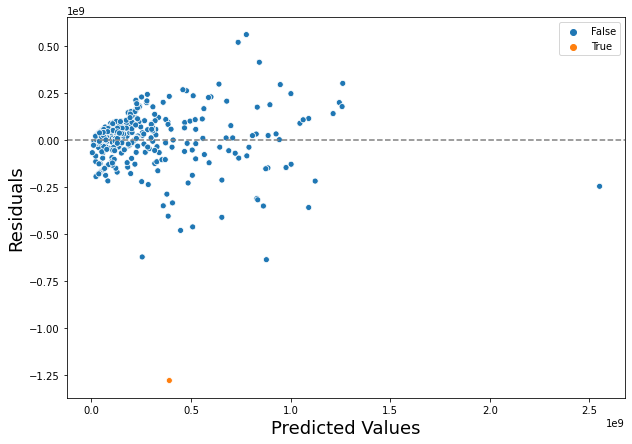

In [120]:
# Use statsmodels to plot the residuals vs the fitted values
plt.figure(figsize=(10, 7))
sns.scatterplot(fit_train.predict(X), fit_train.predict(X)-y, hue = y.index == 'Jurassic Park III')    #change this if working with sklearn

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);

In [121]:
y[y > 1650000000]

movie_title
Jurassic Park III         1.670401e+09
Avengers: Infinity War    2.797801e+09
Name: sequel_worldwide_total_gross, dtype: float64

### Since Jurassic Park III's sequel was way underpredicted, I decided to add a "next_gen" feature

In [122]:
only_originals['next_gen'] = np.where(only_originals.time_between_sequel > 10, 1, 0)

In [123]:
X = only_originals.loc[:, only_originals.columns != 'sequel_worldwide_total_gross']
y = only_originals['sequel_worldwide_total_gross']

In [124]:
# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=40)

In [125]:
model = LinearRegression() 

fit_train = model.fit(X, y)
score_train = fit_train.score(X, y)
score_train

0.7933619176534171

In [126]:
score_test = fit_train.score(X_test, y_test)
score_test

0.747079937220662

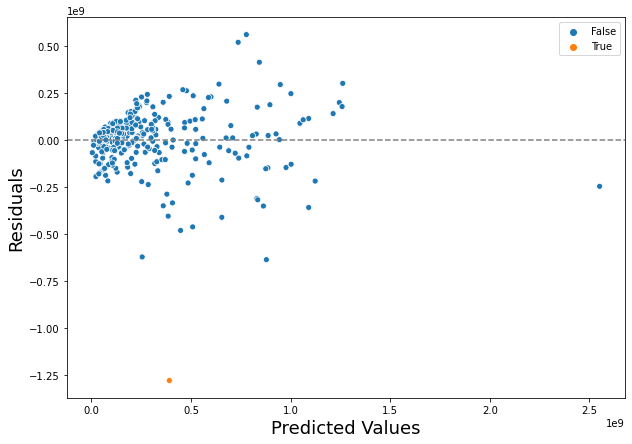

In [127]:
plt.figure(figsize=(10, 7))
sns.scatterplot(fit_train.predict(X), fit_train.predict(X)-y, hue = y.index == 'Jurassic Park III')

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);

### Now I will run Poly Reg to get interactions

In [128]:
from sklearn.preprocessing import PolynomialFeatures
p = PolynomialFeatures(degree = 2, interaction_only = True)
x_train_poly = p.fit_transform(X)
model.fit(x_train_poly,y)
model.score(x_train_poly,y)

0.7561936158293664

In [129]:
model.score(p.transform(X_test), y_test)

0.4979086663440103

### Now to run Lasso / Ridge to reduce overfitting

In [130]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

In [131]:
m = LassoCV(tol = 0.001, max_iter = 10000)
s = StandardScaler(with_mean=False)
X_train_poly_scaled = s.fit_transform(x_train_poly)
m.fit(X_train_poly_scaled, y)
m.score(X_train_poly_scaled, y)

0.8085038877431372

In [132]:
m.score(s.transform(p.transform(X_test)),y_test)

0.7278651751039615

In [133]:
mr = RidgeCV()

mr.fit(X_train_poly_scaled, y)
mr.score(X_train_poly_scaled, y)

0.8864024763267059

In [134]:
mr.score(s.transform(p.transform(X_test)),y_test)

0.5555983843152501

## So the simple linear regression has the best R^2, using that to determine residuals and coefficients

In [137]:
selected_columns = only_originals.columns[only_originals.columns != 'sequel_worldwide_total_gross']
selected_columns

Index(['domestic_total_gross', 'worldwide_total_gross', 'opening_weekend_rev',
       'budget', 'runtime_minutes', 'IMDb_rating', 'time_between_sequel',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Fantasy', 'Horror', 'Sci-Fi', 'Thriller', 'G', 'NC-17', 'PG', 'PG-13',
       'R', 'domestic_total_gross2', 'bugdetsqrt', 'IMDb_rating2',
       'time_between_sequel3', 'next_gen'],
      dtype='object')

In [138]:
model.fit(X, y)
test_set_pred = model.predict(X_test)

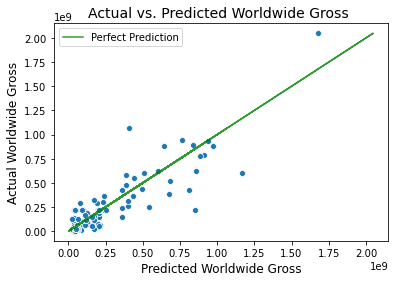

In [139]:
sns.scatterplot(test_set_pred, y_test)
plt.plot(y_test, y_test, alpha = 0.8, label = 'Perfect Prediction', c = 'g')
plt.ylabel('Actual Worldwide Gross', fontsize = 12)
plt.xlabel('Predicted Worldwide Gross', fontsize = 12)
plt.title('Actual vs. Predicted Worldwide Gross ', fontsize = 14)
plt.legend()
plt.savefig('actualvspredicted.png')

In [140]:
y_test[(200000000 < y_test) & (y_test < 230000000)]

movie_title
30 Days of Night                           2.176111e+08
The Chronicles of Riddick                  2.176111e+08
Walking Tall: Lone Justice                 2.176111e+08
The Wonderful World of Disney              2.176111e+08
Darkman II: The Return of Durant           2.176111e+08
The Little Mermaid 2: Return to the Sea    2.176111e+08
Love's Unending Legacy                     2.176111e+08
Ghostbusters                               2.153947e+08
Mission: Impossible 7                      2.176111e+08
Hollow Man                                 2.176111e+08
The Marine                                 2.176111e+08
Cruel Intentions                           2.176111e+08
Walking Tall Part II                       2.176111e+08
Red Riding: The Year of Our Lord 1980      2.176111e+08
Walking Tall: The Payback                  2.176111e+08
Mission: Impossible - Fallout              2.176111e+08
The Prophecy                               2.176111e+08
Name: sequel_worldwide_total_gross, 

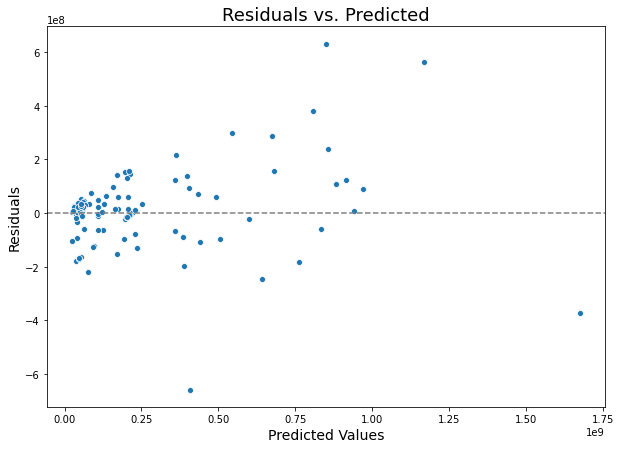

In [141]:
plt.figure(figsize=(10, 7))
sns.scatterplot(test_set_pred, test_set_pred-y_test)

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs. Predicted', fontsize = 18)
plt.savefig('residualsvspredicted.png')

In [142]:
outliars = ['Toy Story 2', 'Avengers: Age of Ultron','Mission: Impossible - Fallout', 'Transformers: Age of Extinction']

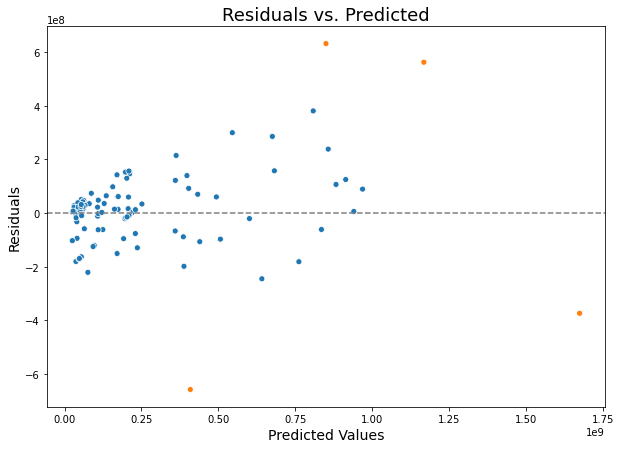

In [143]:
plt.figure(figsize=(10, 7))
sns.scatterplot(test_set_pred, test_set_pred-y_test, hue = y_test.index.isin(outliars))

plt.legend([],[], frameon=False)

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs. Predicted', fontsize = 18)
plt.savefig('residualsvspredicted.png')

In [149]:
X_scaled = s.fit_transform(X)
model.fit(X_scaled, y)
list(zip(X.columns, model.coef_))

[('domestic_total_gross', -80380726.17499156),
 ('worldwide_total_gross', 217030806.9201225),
 ('opening_weekend_rev', 59136506.32000161),
 ('budget', 115237977.72408362),
 ('runtime_minutes', -17230721.32804685),
 ('IMDb_rating', -81157763.91609234),
 ('time_between_sequel', -10432338.18620371),
 ('Adventure', -11822907.16468929),
 ('Animation', -114969.50959299087),
 ('Biography', -99172.5949985167),
 ('Comedy', -20295981.96783533),
 ('Crime', -4668404.317836219),
 ('Drama', -12517225.838867329),
 ('Fantasy', -103707.18097469019),
 ('Horror', -19330182.69244652),
 ('Sci-Fi', -1310980.5102671126),
 ('Thriller', -18210.13774129507),
 ('G', -17856466.73737363),
 ('NC-17', -6269989.996576032),
 ('PG', -6468250.062790425),
 ('PG-13', 4476064.54444943),
 ('R', -14104768.901470365),
 ('domestic_total_gross2', 41244160.02118705),
 ('bugdetsqrt', -71463936.39560682),
 ('IMDb_rating2', 96694628.90607008),
 ('time_between_sequel3', -303793.5416236472),
 ('next_gen', 20018275.562810943)]

In [150]:
coefficients = pd.DataFrame(list(zip(list(X.columns), model.coef_)))
coefficients.drop([22, 23, 24, 25], inplace = True)
coefficients.rename(columns={0: "x", 1: "y"}, inplace = True)
coefficients = coefficients.reindex(coefficients.y.abs().sort_values(ascending = True).index)
coefficients 

,x,y
16,Thriller,-1.821014e+04
9,Biography,-9.917259e+04
13,Fantasy,-1.037072e+05
8,Animation,-1.149695e+05
15,Sci-Fi,-1.310981e+06
20,PG-13,4.476065e+06
11,Crime,-4.668404e+06
18,NC-17,-6.269990e+06
19,PG,-6.468250e+06
6,time_between_sequel,-1.043234e+07


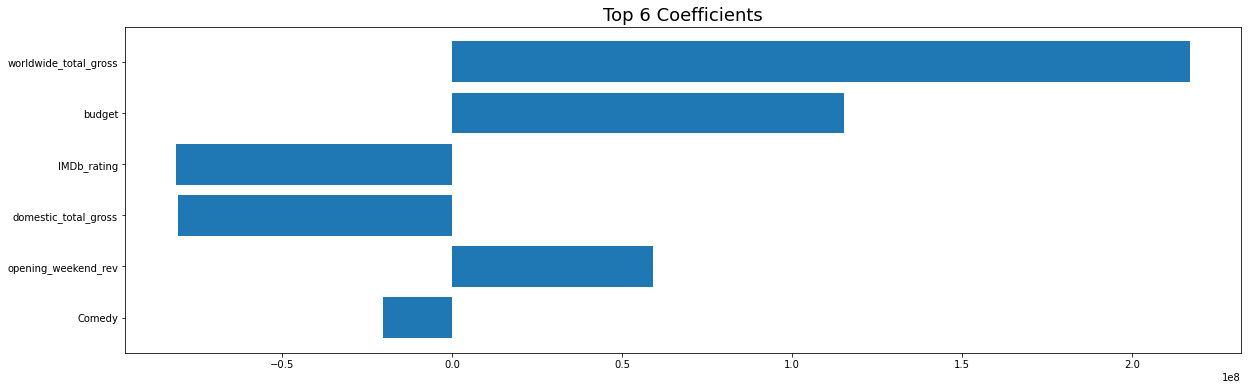

In [151]:
plt.figure(figsize = (20,6))
plt.barh(coefficients['x'][-6:], width = coefficients['y'][-6:], align = 'center')
plt.title('Top 6 Coefficients', fontsize = 18)
plt.savefig('top6coefficients.png')